In [1]:
#!git clone https://github.com/calebchiam/cs6742-fork

Cloning into 'cs6742-fork'...
remote: Enumerating objects: 172, done.
remote: Counting objects: 100% (172/172), done.
remote: Compressing objects: 100% (114/114), done.
remote: Total 3653 (delta 101), reused 116 (delta 57), pack-reused 3481
Receiving objects: 100% (3653/3653), 39.07 MiB | 1.03 MiB/s, done.
Resolving deltas: 100% (2369/2369), done.


In [1]:
from tqdm import tqdm
import os
# replace file path below with your own local convokit
os.chdir('/Users/marianneaubin/Documents/Classes/CS6742/cs6742-fork')
#os.chdir('/Users/grace/cs6742-fork/')
import convokit
from convokit import Corpus, User, Utterance
from convokit import PolTracker, EmoTracker
import nltk

In [2]:
# load corpus
corpus_instance = "news"
# politics, democrats, Liberal, The_Donald
path = "../datasets/" + corpus_instance + "-filtered-labelled-small"
corpus = convokit.Corpus(filename=path)

In [3]:
corpus.print_summary_stats()

Number of Users: 224557
Number of Utterances: 1298310
Number of Conversations: 25695


In [4]:
pt = PolTracker()
corpus = pt.transform(corpus)

In [5]:
et = EmoTracker()
corpus = et.transform(corpus)

processed  10000 utterances 
processed  20000 utterances 
processed  30000 utterances 
processed  40000 utterances 
processed  50000 utterances 
processed  60000 utterances 
processed  70000 utterances 
processed  80000 utterances 
processed  90000 utterances 
processed  100000 utterances 
processed  110000 utterances 
processed  120000 utterances 
processed  130000 utterances 
processed  140000 utterances 
processed  150000 utterances 
processed  160000 utterances 
processed  170000 utterances 
processed  180000 utterances 
processed  190000 utterances 
processed  200000 utterances 
processed  210000 utterances 
processed  220000 utterances 
processed  230000 utterances 
processed  240000 utterances 
processed  250000 utterances 
processed  260000 utterances 
processed  270000 utterances 
processed  280000 utterances 
processed  290000 utterances 
processed  300000 utterances 
processed  310000 utterances 
processed  320000 utterances 
processed  330000 utterances 
processed  340000 u

In [6]:
shooting_timestamps = {
 'Fort Hood shooting': (1257397200, 1258088400),
 'Binghamton shootings': (1238731200, 1239422400),
 'Geneva County massacre': (1236657600, 1237348800),
 'Sandy Hook Elementary School shooting': (1355461200, 1356152400),
 'Aurora theater shooting': (1342756800, 1343448000),
 'Washington Navy Yard shooting': (1379304000, 1379995200),
 'San Bernardino attack': (1449032400, 1449723600),
 'Orlando nightclub shooting': (1465704000, 1466395200),
 'Las Vegas shooting': (1506830400, 1507521600),
 'Sutherland Springs church shooting': (1509854400, 1510545600),
 'Stoneman Douglas High School shooting': (1518584400, 1519275600),
 'Santa Fe High School shooting': (1526616000, 1527307200)}

In [7]:
def identify_bin_by_timestamp(bins, timestamp):
    for time_bin in bins:
        if time_bin[0] <= timestamp <= time_bin[1]:
            return time_bin
    return None

In [8]:
def get_counts_over_time(corpus, event, duration, bin_size):
    utts = [utt for utt in corpus.iter_utterances() if utt.meta['event'] == event and utt.meta['valid']]
    if len(utts)> 0:
        min_timestamp = min([utt.timestamp for utt in utts])
        num_bins = duration // bin_size
        bins = [(min_timestamp, min_timestamp + ((i+1)*bin_size) - 1) for i in range(num_bins)]

        bin_counts = defaultdict(int)

        for utt in utts:
            time_bin = identify_bin_by_timestamp(bins, utt.timestamp)
            if time_bin is not None:
                bin_counts[time_bin] += 1

        y = list(bin_counts.values())
        x = [i+1 for i in range(num_bins)]
    else:
        y = []
    return y

In [9]:
import numpy as np
from collections import defaultdict
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
def get_scores_over_time(corpus, event, duration, bin_size, keyword):
    utts = [utt for utt in corpus.iter_utterances() if utt.meta['event'] == event and utt.meta['valid']]
    if len(utts) > 0:
        min_timestamp = min([utt.timestamp for utt in utts])
        num_bins = duration // bin_size
        bins = [(min_timestamp, min_timestamp + ((i+1)*bin_size) - 1) for i in range(num_bins)]

        bin_values = defaultdict(list)

        for utt in utts:
            time_bin = identify_bin_by_timestamp(bins, utt.timestamp)
            if time_bin is not None:
                if keyword == "political":
                    bin_values[time_bin].append(utt.meta['political'])
                else:
                    bin_values[time_bin].append(utt.meta['analysis'][keyword])

        for time_bin, values in bin_values.items():
            bin_values[time_bin] = np.mean(values)

        y = list(bin_values.values())
        x = [i+1 for i in range(num_bins)]
    else:
        y = []
    return y

In [11]:
hour = 60*60
threehour = 3*hour
sixhour = 6*hour
halfday = 12*hour
day = 24*hour
week = 7*day
twoweek = 14*day

In [12]:
import pandas as pd
from itertools import product

In [13]:
categories = [
    "sadness", "violence","rage","pain","anger","love","politics", "political"
]

In [52]:
counts_over_time_all = [(event, get_counts_over_time(corpus, event, twoweek, threehour)) for event in shooting_timestamps]
print(counts_over_time_all)

[('Fort Hood shooting', [1, 2, 6, 52, 196, 86, 41, 17, 16, 20, 71, 64, 42, 23, 33, 18, 23, 25, 26, 30, 34, 15, 16, 13, 15, 13, 6, 7, 8, 6, 8, 9, 13, 14, 15, 19, 14, 31, 4, 11, 9, 37, 23, 33, 10, 5, 20, 10, 10, 15, 4, 7, 1, 1, 9, 21, 21, 12, 3, 2, 1, 17, 42, 70, 46, 12, 5, 7, 4, 11, 16, 15, 3, 7, 3, 2, 4, 2, 8, 5, 6, 6, 4, 2, 4, 3, 10, 3, 4, 5, 3, 12, 6, 6, 4, 1, 10, 7, 5, 3, 1, 2]), ('Binghamton shootings', [22, 25, 10, 8, 9, 18, 21, 6, 5, 2, 6, 4, 5, 2, 5, 1, 1, 2, 5, 2, 1, 4, 3, 2, 1, 3, 3, 1, 14, 8, 7, 3, 12, 7, 10, 2, 4, 4, 1, 6, 1, 2, 7, 3, 1, 2, 1, 5, 2, 2, 2, 1, 2, 1, 4, 1, 5, 23, 13, 10, 13, 1, 3, 3, 1, 1, 4, 1, 1, 24, 8, 18, 20, 2, 2, 5, 3, 4, 5, 7, 4, 1, 1]), ('Geneva County massacre', [4, 3, 1, 3, 3, 16, 10, 9, 4, 4, 23, 10, 12, 7, 1, 2, 3, 9, 1, 1, 7, 8, 3, 1, 1, 2, 2, 3, 1, 1, 2, 5, 4, 3, 4, 12, 4, 7, 6, 1, 2, 1, 2, 9, 6, 13, 11, 3, 3, 2, 1, 2, 1, 6, 3, 1, 4, 2, 3, 1, 3, 1, 1, 6, 6, 10, 2, 1, 1, 12, 16, 8, 3, 4, 1, 3, 1, 1, 1]), ('Sandy Hook Elementary School shooting', [7

In [14]:
#pol_scores_over_time_all = [(event, get_scores_over_time(corpus, event, twoweek, threehour, "political")) for event in shooting_timestamps]
#sad_scores_over_time_all = [(event, get_scores_over_time(corpus, event, twoweek, threehour, "sadness")) for event in shooting_timestamps]
scores_over_time_all = {}
for i,cat in enumerate(categories):
    scores_over_time_all[cat] = [(event, get_scores_over_time(corpus, event, twoweek, threehour, cat)) for event in shooting_timestamps]

In [15]:
pol2_scores_over_time_all = [(event, get_scores_over_time(corpus, event, twoweek, threehour, "politics")) for event in shooting_timestamps]

In [16]:
f = pd.DataFrame()

counts_data = []
scores_data = {}
for cat in categories:
    scores_data[cat] = []

for counts_over_time in counts_over_time_all:
    event = counts_over_time[0]
    counts = counts_over_time[1]
    for idx, count in enumerate(counts):
        counts_data.append([event, idx+1, count])        
        
for cat in categories:
    curr_scores_over_time_all = scores_over_time_all[cat]
    for scores_over_time in scores_over_time_all[cat]:
        event = scores_over_time[0]
        scores = scores_over_time[1]
        for idx, score in enumerate(scores):
            scores_data[cat].append([event, idx+1, score])
        
#for pol_scores_over_time in pol_scores_over_time_all:
#    event = pol_scores_over_time[0]
#    scores = pol_scores_over_time[1]
#    for idx, score in enumerate(scores):
#        pol_scores_data.append([event, idx+1, score])

In [17]:
pol2_scores_data = []

for pol2_scores_over_time in pol2_scores_over_time_all:
    event = pol2_scores_over_time[0]
    scores = pol2_scores_over_time[1]
    for idx, score in enumerate(scores):
        pol2_scores_data.append([event, idx+1, score])

In [18]:
counts_df = pd.DataFrame(counts_data, columns=['event', 'time_bin', 'count'])
#sad_scores_df = pd.DataFrame(sad_scores_data, columns=['event', 'time_bin', 'score'])
#pol_scores_df = pd.DataFrame(pol_scores_data, columns=['event', 'time_bin', 'score'])
scores_df = {}
for cat in categories:
    scores_df[cat] = pd.DataFrame(scores_data[cat], columns=['event', 'time_bin', 'score'])

In [19]:
pol2_scores_df = pd.DataFrame(pol2_scores_data, columns=['event', 'time_bin', 'score'])

In [20]:
scores_df["political"].head() #This gives us 3-hour interval data, great!

,event,time_bin,score
0,Fort Hood shooting,1,0.000000
1,Fort Hood shooting,2,0.000000
2,Fort Hood shooting,3,0.166667
3,Fort Hood shooting,4,0.038462
4,Fort Hood shooting,5,0.045918


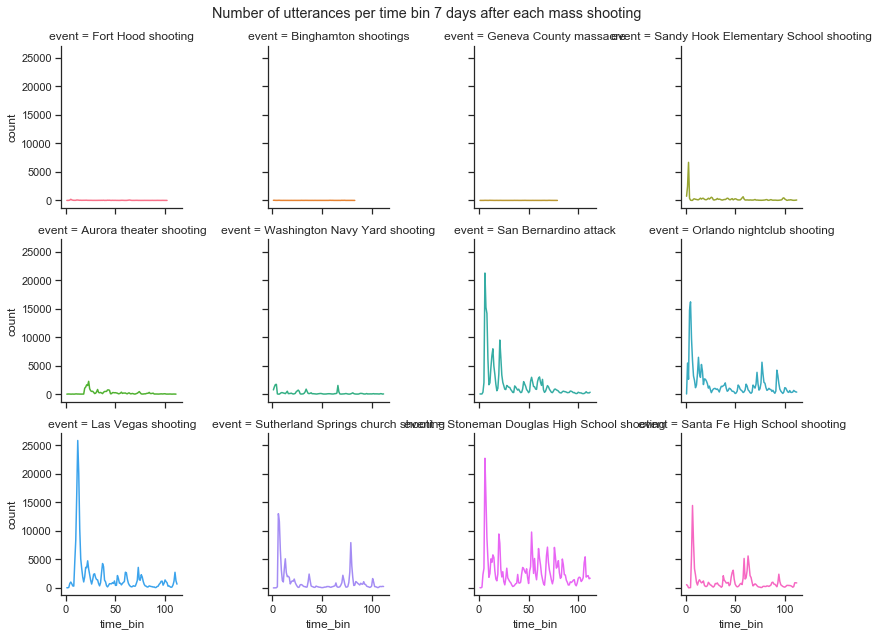

In [22]:
%matplotlib qt5
%matplotlib inline

import seaborn as sns; sns.set(style="ticks", color_codes=True)

g = sns.FacetGrid(data=counts_df, col="event", hue='event', col_wrap=4)
g = g.map(plt.plot, "time_bin", "count")

plt.subplots_adjust(top=0.92)
g = g.fig.suptitle('Number of utterances per time bin 7 days after each mass shooting')
 
plt.show()

In [163]:
#scores_df.to_csv('event_poliscores_timeseries.csv')

In [23]:
from pandas import Series
from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose

events = {}
for cat in categories:
    events[cat] = scores_df[cat].event.unique()

print(events["sadness"])

['Fort Hood shooting' 'Binghamton shootings' 'Geneva County massacre'
 'Sandy Hook Elementary School shooting' 'Aurora theater shooting'
 'Washington Navy Yard shooting' 'San Bernardino attack'
 'Orlando nightclub shooting' 'Las Vegas shooting'
 'Sutherland Springs church shooting'
 'Stoneman Douglas High School shooting' 'Santa Fe High School shooting']


In [142]:
def get_result(scores_df, events, keyword):
    if keyword == "political":
        series = scores_df[(scores_df.event == events[i])]
        print(scores_df)
        print(series)
        series2 = series['score']
        series2.index = series['time_bin']
    else:
        series = scores_df[(scores_df.event == events[i])]
        series2 = series['score']
        series2.index = series['time_bin']
    return seasonal_decompose(series2, model='additive', freq=8)

In [161]:
sadness_words = ["sadness", "pain", "love"]
anger_words = ["rage", "violence", "anger", "political"]
pol_words = ["politics"]

def get_cat_colour(cat):
    if cat in sadness_words:
        return "teal"
    elif cat in anger_words:
        return "black"
    elif cat in pol_words:
        return "grey"

In [36]:
print(scores_df["politics"])

                              event  time_bin     score
0                Fort Hood shooting         1  0.000000
1                Fort Hood shooting         2  0.000000
2                Fort Hood shooting         3  0.166667
3                Fort Hood shooting         4  0.038462
4                Fort Hood shooting         5  0.010204
5                Fort Hood shooting         6  0.058140
6                Fort Hood shooting         7  0.000000
7                Fort Hood shooting         8  0.000000
8                Fort Hood shooting         9  0.000000
9                Fort Hood shooting        10  0.000000
10               Fort Hood shooting        11  0.042254
11               Fort Hood shooting        12  0.046875
12               Fort Hood shooting        13  0.071429
13               Fort Hood shooting        14  0.086957
14               Fort Hood shooting        15  0.000000
15               Fort Hood shooting        16  0.111111
16               Fort Hood shooting        17  0

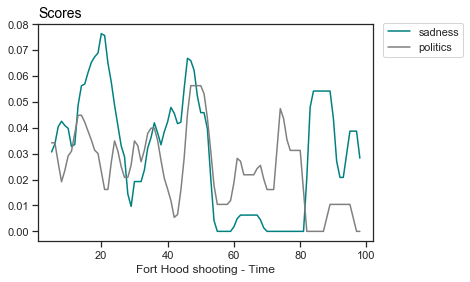

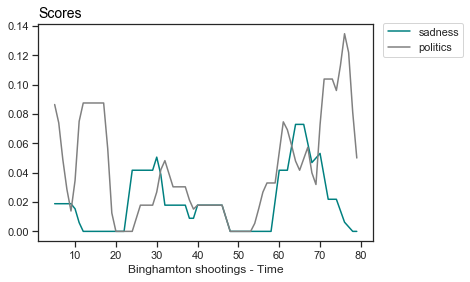

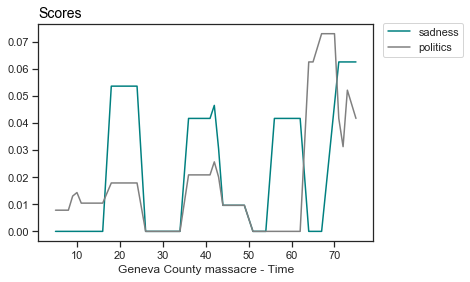

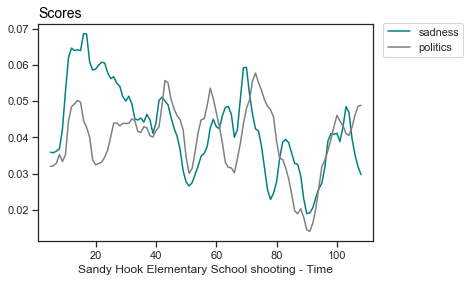

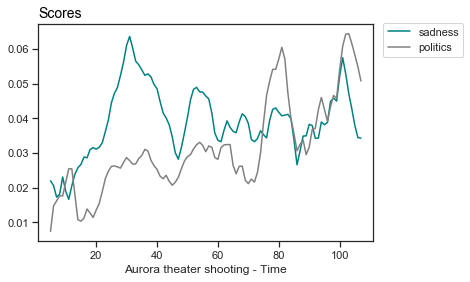

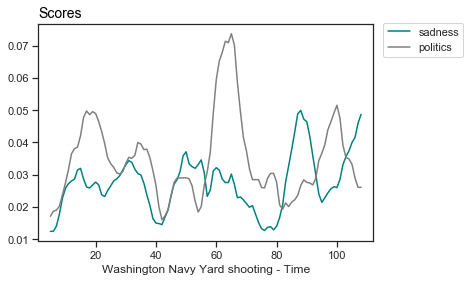

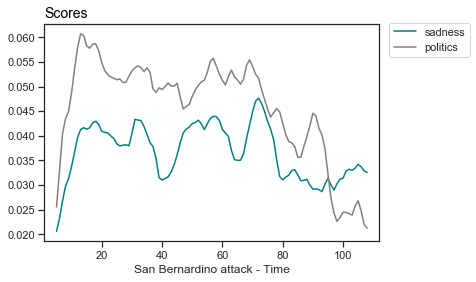

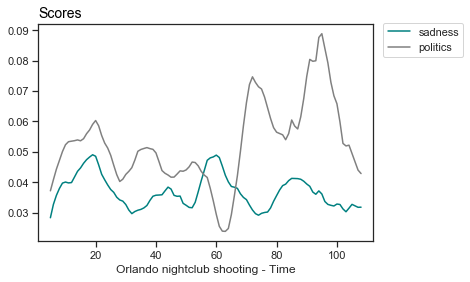

In [137]:
%matplotlib inline
for i in list(range(0, len(events))):
    for cat in categories:
        if cat == "politics" or cat == "sadness":
            results = get_result(scores_df[cat], events[cat], cat)
            results.trend.plot(label=cat, color=get_cat_colour(cat))
    plt.title("Scores", loc='left', fontsize=14, fontweight=0, color='black')
    pyplot.xlabel(events["sadness"][i] + " - Time")
    pyplot.legend(loc='upper center', bbox_to_anchor=(1.15, 1.03))
    pyplot.show()
print(results)

In [47]:
def get_agg_scores_over_time(corpus, duration, bin_size, keyword):
    utts = [utt for utt in corpus.iter_utterances() if utt.meta['valid']]
    if len(utts) > 0:
        min_timestamp = min([utt.timestamp for utt in utts])
        num_bins = duration // bin_size
        bins = [(min_timestamp, min_timestamp + ((i+1)*bin_size) - 1) for i in range(num_bins)]

        bin_values = defaultdict(list)

        for utt in utts:
            time_bin = identify_bin_by_timestamp(bins, utt.timestamp)
            if time_bin is not None:
                if keyword == "political":
                    bin_values[time_bin].append(utt.meta['political'])
                else:
                    bin_values[time_bin].append(utt.meta['analysis'][keyword])

        for time_bin, values in bin_values.items():
            bin_values[time_bin] = np.mean(values)

        y = list(bin_values.values())
        x = [i+1 for i in range(num_bins)]
    else:
        y = []
    return y

In [53]:
def get_agg_counts_over_time(corpus, duration, bin_size):
    utts = [utt for utt in corpus.iter_utterances() if utt.meta['valid']]
    if len(utts)> 0:
        min_timestamp = min([utt.timestamp for utt in utts])
        num_bins = duration // bin_size
        bins = [(min_timestamp, min_timestamp + ((i+1)*bin_size) - 1) for i in range(num_bins)]

    #    bin_counts = defaultdict(int)

     #   for utt in utts:
     #       time_bin = identify_bin_by_timestamp(bins, utt.timestamp)
     #       if time_bin is not None:
     #           bin_counts[time_bin] += 1

      #  y = list(bin_counts.values())
      #  x = [i+1 for i in range(num_bins)]
    #else:
    #    y = []
    #return y

In [110]:
def identify_bin_by_timestamp(bins, timestamp):
    for i,time_bin in enumerate(bins):
       # print(time_bin[0])
        if time_bin[0] <= timestamp <= time_bin[1]:
            return i
    return None

In [120]:
time_bins = {}

for i in range(1,113):
    time_bins[i] = []
        
bin_values_political = [0]*112
bin_values_politics = [0]*112
bin_values_sadness = [0]*112

bin_values_total = [0]*112
        
for event in shooting_timestamps:
    utts = [utt for utt in corpus.iter_utterances() if utt.meta['event'] == event and utt.meta['valid']] 
    min_timestamp = min([utt.timestamp for utt in utts])
    num_bins = twoweek // threehour
    bins = [(min_timestamp, min_timestamp + ((i+1)*threehour) - 1) for i in range(num_bins)]
        
    for utt in utts:
        time_bin_idx = identify_bin_by_timestamp(bins, utt.timestamp)
        if time_bin_idx is not None:
            bin_values_total[time_bin_idx] += 1
            if utt.meta['political'] == 1:
                bin_values_political[time_bin_idx] += 1
            if utt.meta['analysis']['politics'] == 1:
                bin_values_politics[time_bin_idx] += 1
            if utt.meta['analysis']['sadness'] == 1:
                bin_values_sadness[time_bin_idx] += 1
            
print(bin_values_political)
print(bin_values_politics)
print(bin_values_sadness)
print(bin_values_total)

[61, 674, 364, 1981, 4723, 10111, 7375, 5157, 3259, 1562, 3379, 6889, 6860, 4897, 3359, 2867, 1835, 863, 1436, 3673, 4639, 2903, 1563, 1349, 737, 346, 629, 1478, 1344, 1161, 912, 757, 489, 237, 477, 1457, 1671, 1223, 993, 907, 629, 411, 741, 1345, 1633, 1633, 1196, 1008, 716, 270, 600, 1317, 3495, 2245, 843, 1264, 1318, 635, 1194, 2244, 2484, 1863, 1039, 954, 471, 210, 611, 1644, 1979, 1334, 1273, 1375, 975, 498, 725, 1945, 2406, 1960, 2606, 1991, 960, 489, 600, 1040, 1011, 815, 753, 632, 445, 293, 545, 2133, 1543, 1131, 721, 748, 571, 271, 494, 961, 1072, 782, 350, 397, 464, 795, 1071, 548, 666, 790, 544, 436]
[16, 186, 131, 743, 1673, 3192, 2410, 1836, 1199, 529, 1039, 2313, 2594, 1879, 1351, 1153, 777, 350, 595, 1405, 1761, 1130, 591, 487, 283, 123, 211, 550, 501, 395, 278, 278, 195, 83, 163, 481, 629, 485, 376, 305, 231, 142, 238, 455, 617, 622, 425, 357, 216, 87, 243, 526, 1036, 746, 298, 462, 545, 275, 559, 1010, 1014, 735, 359, 327, 168, 76, 226, 705, 777, 471, 486, 525, 400, 17

In [123]:
bin_values_political_scores = [0]*112
bin_values_politics_scores = [0]*112
bin_values_sadness_scores = [0]*112

for i in range (0,112):
    bin_values_political_scores[i] = bin_values_political[i]/bin_values_total[i]
    bin_values_politics_scores[i] = bin_values_politics[i]/bin_values_total[i]
    bin_values_sadness_scores[i] = bin_values_sadness[i]/bin_values_total[i]

In [126]:
agg = {'Political':bin_values_political_scores, 'Politics': bin_values_politics_scores, 
          'Sadness':bin_values_sadness_scores}
agg_df = pd.DataFrame(agg)
print(agg_df)

     Political  Politics   Sadness
0     0.051304  0.013457  0.020185
1     0.085370  0.023559  0.023559
2     0.079096  0.028466  0.029552
3     0.071506  0.026819  0.028299
4     0.100404  0.035565  0.037351
5     0.125495  0.039618  0.034591
6     0.134543  0.043966  0.033513
7     0.140201  0.049914  0.035098
8     0.140717  0.051770  0.033938
9     0.102851  0.034832  0.031277
10    0.132468  0.040732  0.033754
11    0.153286  0.051466  0.038806
12    0.152090  0.057510  0.041237
13    0.150482  0.057741  0.042745
14    0.151347  0.060872  0.039876
15    0.148411  0.059685  0.041050
16    0.149796  0.063429  0.047102
17    0.147648  0.059880  0.045338
18    0.146471  0.060690  0.041106
19    0.169999  0.065028  0.040128
20    0.177542  0.067396  0.046041
21    0.148643  0.057860  0.040092
22    0.133373  0.050431  0.034474
23    0.131983  0.047647  0.034145
24    0.132316  0.050808  0.034470
25    0.123926  0.044054  0.037607
26    0.108206  0.036298  0.030965
27    0.130531  0.04

In [183]:
def get_result_agg(agg_df, keyword):
    if keyword == "political":
        series = agg_df['Political']
    elif keyword == "politics":
        series = agg_df['Politics']
    else:
        series = agg_df['Sadness']
    return seasonal_decompose(series, model='additive', freq=8)

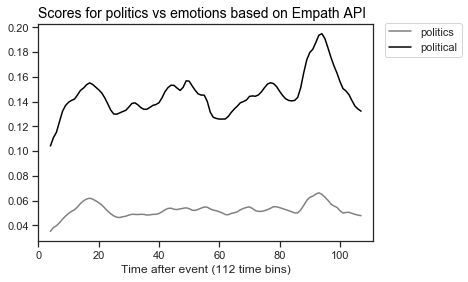

In [193]:
%matplotlib inline
#results = get_result_agg(agg_df)
for cat in categories:
    if cat == "politics" or cat == "political":
        results = get_result_agg(agg_df, cat)
        results.trend.plot(label=cat, color=get_cat_colour(cat))
plt.title("Scores for politics vs emotions based on Empath API", loc='left', fontsize=14, fontweight=0, color='black')
pyplot.xlabel("Time after event (112 time bins)")
pyplot.legend(loc='upper center', bbox_to_anchor=(1.15, 1.03))
pyplot.show()

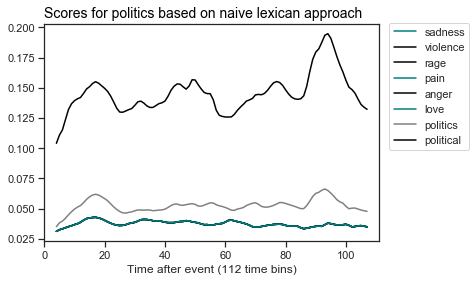

In [192]:
%matplotlib inline
#results = get_result_agg(agg_df)
for cat in categories:
    if cat == "political" or "politics":
        results = get_result_agg(agg_df, cat)
        results.trend.plot(label=cat, color=get_cat_colour(cat))
plt.title("Scores for politics based on naive lexican approach", loc='left', fontsize=14, fontweight=0, color='black')
pyplot.xlabel("Time after event (112 time bins)")
pyplot.legend(loc='upper center', bbox_to_anchor=(1.15, 1.03))
pyplot.show()

In [191]:
from scipy import stats
print(agg_df.corr(method='kendall'))
print(stats.pearsonr(agg_df['Political'], agg_df['Politics']))
print(stats.kendalltau(agg_df['Political'], agg_df['Politics']))

           Political  Politics   Sadness
Political   1.000000  0.545689  0.123552
Politics    0.545689  1.000000  0.196911
Sadness     0.123552  0.196911  1.000000
(0.8400593496513429, 5.468043843535662e-31)
KendalltauResult(correlation=0.5456885456885456, pvalue=1.4747443312025902e-17)


In [51]:
print(counts_over_time_all)
#print(scores_over_time_all)

[[4, 3, 19, 13, 3, 16, 10, 9, 4, 4, 23, 10, 12, 7, 1, 2, 3, 9, 1, 1, 7, 8, 3, 1, 1, 2, 2, 3, 1, 1, 2, 5, 4, 3, 4, 12, 4, 7, 6, 1, 2, 1, 2, 9, 6, 13, 11, 3, 3, 2, 1, 2, 1, 6, 3, 1, 4, 2, 3, 1, 3, 1, 1, 6, 6, 10, 2, 1, 1, 12, 16, 8, 3, 4, 1, 3, 1, 1, 1]]


In [ ]:
counts_over_time_all = [(event, get_counts_over_time(corpus, event, twoweek, threehour)) for event in shooting_timestamps]
#pol_scores_over_time_all = [(event, get_scores_over_time(corpus, event, twoweek, threehour, "political")) for event in shooting_timestamps]
#sad_scores_over_time_all = [(event, get_scores_over_time(corpus, event, twoweek, threehour, "sadness")) for event in shooting_timestamps]
scores_over_time_all = {}
for i,cat in enumerate(categories):
    scores_over_time_all[cat] = [(event, get_scores_over_time(corpus, event, twoweek, threehour, cat)) for event in shooting_timestamps]

In [194]:
utts = [utt for utt in corpus.iter_utterances() if utt.meta['valid']]

Utterance({'id': '3v3p4p', 'user': User([('name', 'BlackTeaLeaves')]), 'root': '3v3p4p', 'reply_to': None, 'timestamp': 1449032734, 'text': '', 'meta': {'score': 8, 'top_level_comment': None, 'retrieved_on': 1454887894, 'gilded': 0, 'gildings': None, 'subreddit': 'news', 'stickied': False, 'permalink': '/r/news/comments/3v3p4p/cleveland_cop_who_killed_12_year_old_tamir_rice/', 'author_flair_text': '', 'event': 'San Bernardino attack', 'valid': True, 'stem_tokens': set(), 'num_pol_words': 0, 'political': 0, 'analysis': {'sadness': 0.0, 'violence': 0.0, 'rage': 0.0, 'pain': 0.0, 'anger': 0.0, 'love': 0.0, 'politics': 0.0}}})


In [213]:
count = 1

## get political utts
for utt in utts:
    if utt.text != "" and utt.text != "[deleted]" and utt.meta['analysis']['politics'] == 0:
        print("utt start:")
        print("empath politics is ", utt.meta['analysis']['politics'])
        print("our politics is " , utt.meta["political"])
        print(utt.text)
        print("=================================")
        count +=1
    if count % 500 == 0:
        break

## get non-political utts

utt start:
empath politics is  0.0
our politics is  1
This megathread is for discussion of the recent Orlando Nightclub shooting. This post will be kept up to date with the latest links from reputable news media organisations. 

Link to current reddit live thread: https://www.reddit.com/live/x2tjnk7gg9wa

Latest Links:

* http://www.abc.net.au/news/2016-06-12/florida-police-confirm-shooting-at-orlando-nightclub/7503770
* http://www.orlandosentinel.com/news/breaking-news/os-families-wait-for-information-at-hospital-after-orlando-nightclub-shooting-20160612-story.html
* http://www.nbcnews.com/storyline/orlando-nightclub-massacre/florida-nightclub-massacre-deadliest-mass-shooting-u-s-history-n590476

Please note while this thread is for discussion of the event we reserve the right to remove any comments that violate [our rules](https://www.reddit.com/r/news/about/rules/)


Duplicate threads have been removed due to having been already submitted.

Brigaded threads have been locked.
utt sta

utt start:
empath politics is  0.0
our politics is  0
A suicide bombing is a very personal act.  
utt start:
empath politics is  0.0
our politics is  0
The 9/11 killers probably bought their box-cutters here in the US.  The 7/7 bombers built their bombs out of readily available materials.  

Crime syndicates import weapons from external sources.



utt start:
empath politics is  0.0
our politics is  0
What does a woman in her eighties (at the time) need with 41,000 of mortgage, and more importantly, how did she plan to pay it off? Was her plan to take a massive mortgage, spend all the money, and then die before she paid it back?
utt start:
empath politics is  0.0
our politics is  0
Fine, downmod away.  It doesn't change the fact that armed citizens have stopped spree killers.
utt start:
empath politics is  0.0
our politics is  1
Lack of media coverage makes it rare? When I belonged to the NRA, I received one of their monthly magazines. The mags always had police reports from across the